# Understanding Generative Adversarial Networks (GANs)

### A Quick Refresher on Generative models

Before we can understasnd GANs, it is important to refresh our memories on what generative models are and how they are different from the classic discriminative methods we have been working with so far. 

If you recall the typicall paradigm of discriminative model has been to create a model that learns some conditional probability distribution $P(y|x)$ where $x$ is some input data and $y$ are your set of output labels. Essentially we are tring to find the probability of some label $y$ given some never before seen data $x$. Generative models however are different, these models seek to learn the joint probability distribution $P(x,y)$ of some data. In layman terms, we are essentially assuming that our data and label comes from some probability distribution and with this assumption in mind we can use this probability to generate samples from this same distribution.

This is one of the most powerful feature of GANs and generative models as whole. The ability to create high quality data samples is a very powerful, and GANs have many applications based on this, from the creation of art, generation of realistic human faces, and more. 

| <img src="images/fake_ai_faces.0.png" width="500"/> |
|:--:|
| <b>Fig 1. Faces generated by GANs [6]</b>|




### Let's talk random...

Before we can begin to understand the formulation of GANs, it is important to understand the motivation and inspiration for the kind of problem we are trying to solve. Random variable generation in computers is one of these problems. By understanding random variable generation in computers I hope you'll be able to see how similar this is to the problem that the formulation of GANs seek to solve!

With that said, computers are designed to be deterministic and consistent which makes it nigh if not impossible for them to truly generate random numbers. However as I am sure you know, most computers these days are able to randomly generate a number given some seed value. This technique is called psuedo-random number generation and with this, it is possible to have a computer that can generate a completely random sequence of numbers that follows uniform distribution. Of course there are many different generators and the implementations of psuedorandom number generation can be rather complex but for now all you need to know with certainty is that computers are easily capable of generating psuedo-random numbers that follow a uniform distribution. 

So being able to generate the uniform distribution is good for certain use cases, but often times having the flexibility to sample and generate new data points that follow a *different* distribution is also very important. This is called **psuedo-random number sampling**. Again like with psuedorandom number generation there are a variety of techniques to implement this from Monte Carlo Simulation to Acceptance Rejection, but the algorithm that we will focus on today is the *inverse transform method*. Using the inverse transform method, we can map our uniform distribution to more complex distributions and this will effectively allow us to generate data from interesting distributions using nothing but a uniform distribution.

> The **inverse transform** is essentially a method in which to represent a complex random variable as a result of a function applied to a uniform random variable

Before we can get into the inverse transform method, lets define the scope and some concepts needed for the formulation of this.

Suppose I have $X$ as a complex random variable that I want to sample from, and $U$ as a uniform random variable over [0,1] that I know how to sample from. Note that a random variable can be represented by its Cumulative Distribution function (CDF). 

> A Cumulative Distribution function (CDF) is a function that represent the probability that a corresponding continuous random variable $X$, has a value less than or equal to some arguement of the function $x$. 

$$CDF_{x}(x)=\mathbb{P}(X \leq x) \in[0,1]$$

> For our uniform random variable $U$ this would be 

$$CDF_{U}(u)=\mathbb{P}(U \leq u)=u  \in[0,1]$$

With the general and uniform equations of CDF established we can begin to formulate the inverse transform method. So our goal is to find some transformation so we can turn our uniform distribution into a more complex distribution. For this examples sake, lets try to transform our uniform distribution to an exponential $\lambda$ distribution using inverse transform sampling.

> The CDF of the exponential distribution is given as follows:

$$ F_{X}(x) = \begin{cases} {1-e^{-\lambda x}}, x \geq 0 \\ 0, x < 0  \end{cases} $$

> Lets define our Transformation as $T$. This is what we want to find. We can write our objective as follows where U is our inform and X as the complex distribution we want to sample from:

$$ T(U) = X $$

> Combine this with the CDF to get the following:

$$ CDF_{x}(x)=\mathbb{P}(X \leq x)=\mathbb{P}(T(U) \leq x) $$

> Now apply the inverse of $T$ inside the parenthesis. Note the inverse of itself yields the argument.

$$ =\mathbb{P}(U \leq T^{-1}(x)) $$

> Now using the nature of the uniform distribution, we can simplify our equation to the following:

$$ =\mathbb{P}(U \leq T^{-1}(x)) = T^{-1}(x) $$

> Tying this all together this yields us the closed form solution for the Transformation we have been trying to solve for. 

$$ CDF_{x}(x) = T^{-1}(x) \text{ or } CDF_{x}^{-1}(x) = T(x)$$

With this, we just proved that the transformation $T$ that we are looking for can be found by getting the CDF of the distribution we want and calculating the inverse CDF of this function which will allow us to transform a uniform distribution into this new distribution. So with our example of the exponential distribution the inverse process would be as follows:

$$ y = 1-e^{-\lambda x} $$
$$ 1 - y = e^{-\lambda x} $$
$$ ln(1-y)=-\lambda x $$
$$ x = \frac{-ln(1-y)}{\lambda} $$

> Plugging in our $U$ for y this will yield our Inverse Transform equation

$$ x = \frac{-ln(1-U)}{\lambda} $$

$$ x = \frac{-ln(U)}{\lambda} \text{Because U is symmetric}$$ 

With this we can transform our uniform distribution into an exponential lambda by passing in say 1000 random values from it into our Inverse Transform equation. So essentially as long as we know the CDF of a particular distribution, we can try to calculate the inverse of it and this will allow us to sample from distributions using nothing but a uniform distribution.

0.01921969843104665
0.018363343123217937


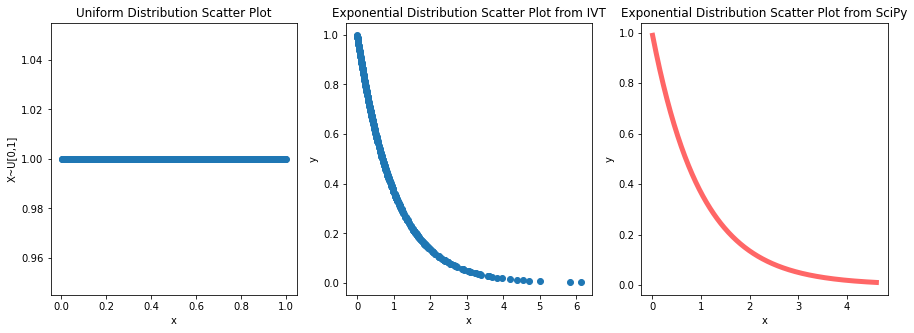

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

point_count = 500

x = np.random.uniform(0,1,point_count) # Generating 2000 points between 0 and 1.

x_exponential = np.linspace(expon.ppf(0.01), expon.ppf(0.99), point_count)


y_exponential_ivt = [ -1*np.log(val) for val in x] # Assuming rate lambda is 1 and perform inverse transform sampling
y = [1 for x in range(0, point_count)]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.scatter(x,y) 
ax1.set_xlabel('x')
ax1.set_ylabel('X~U[0,1]')
ax1.set_title("Uniform Distribution Scatter Plot")

ax2.scatter(y_exponential_ivt,x) 
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title("Exponential Distribution Scatter Plot from IVT")

y_exponential = expon.pdf(x_exponential)

ax3.plot(x_exponential, y_exponential,'r-', lw=5, alpha=0.6, label='expon pdf')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_title("Exponential Distribution Scatter Plot from SciPy")

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

nearest_ivt = find_nearest(y_exponential_ivt, 4)
nearest_real = find_nearest(x_exponential, 4)
print(x[nearest_ivt])
print(y_exponential[nearest_real])

### Tying this in with the formulation of GANs

#### The problem of capturing nature and reality...

Lets transition back to GANs. Lets say that I'm interested in generating black and white images of a face with a size of n by n. We can reshape this and represent this data as $N$, a vector consisting of each column of the image stacked on top of each other. We can say that due to the similarity of human faces, there exists some specific probability among the entire $N$ space that gives something that look like a face. We can apply this concept of similarity to other things such as birds, cars, etc as well.

> **Essentially, the problem of finding this particular "human face distribution" that represents the faces of others over the $N$ dimensional vector space is the same as the problem explored and solved by Inverse Transform Sampling. Essentially we are trying to map some distribution that we do know, whether that be random, uniform, etc, into a distribution that represents what we are trying to generate, in this case faces.**

#### Lets find a transform using neural networks!

However, it is important to know, as with most things in nature, the probability distribution of things in nature is almost always very complex and is over a massive space. Even if we assume this distribution exists (aka there exists images that look like different dogs) we still would not be able to express this explicitly and this would make it very hard to generate images from this distribution! In terms of inverse transform, we cannot express this complex distribution as a CDF and therefore we would not be able to find an inverse transform of this distribution as well. *If only we could find a transform that allows us to transform a distribution we do know into one that could represent the more complex face distribution, we could simply use this function to generate new images of faces...*

This is a problem for neural networks! By using neural networks we are able to model very complex functions and this gives us a chance to try to learn the transform function from the data that will allow us to generate images of human faces from a distribution that we do know. Thus the idea should be to design an architecture that would allow us to take in a simple random distribution and transform that into one that is more complex using some kind of generative neural network to learn this unknown transform from the data.

### Archiectures and approaches to find this transform

We need to design a network that can find this unknown transform. There are two approaches we can take to solve for this transform. **Direct and Indirect**. The Direct method follows the traditional neural network approach and consist of comparing the difference between the true versus the generated probability distribution and backpropagating the error through the network. This architecture is called the Generative Matching Networks (GMNs). The indirect approach very different. Instead of calculating the error and backpropagating it through the network, we train the network by using a downstream task that also result in the optimization and improvement of the generated distribution of the network. This is the approach used by GANs. For now, it is important to understand the direct approach before understanding why GANs work.

### Generative Matching Networks

As mentioned earlier, to even backpropagate, we need to first define our true labels. Off the bat the problems mentioned earlier when it comes to representing the true distribution, make it impossible for us to obtain a true label to compare to our generated distribution to. Because of this, direct comparisons are off the table and we must find a proxy that will allow us to do this. One way to tackle this problem is to use the probability distribution from a sample of images to act as the ground truth. Now that we have our ground truth, we now need a means to compare the distributions ot obtain an error. There are a variety of similarity measures such as KL-Divergence that can be used to compare two distributions, but Maximum Mean Discrepancy (MMD) is the most used approach.

> Maximum Mean Discrepancy is a kernel based similarity metric that is used to determine the similarity between two distributions via the use of samples drawn from both distributions. There are multiple definitions for it that accomplish the same thing. The formulations of it are outside the scope of this notebook but if you would like to learn more you can find some helpful resources [here](http://www.gatsby.ucl.ac.uk/~gretton/papers/GreBorRasSchSmo07.pdf), [here](http://www.gatsby.ucl.ac.uk/~gretton/papers/testing_workshop.pdf), and [here](https://www.kaggle.com/code/onurtunali/maximum-mean-discrepancy/notebook#Implementation-of-MMD).

| <img src="images/GMN0.png" width="500"/> |
|:--:|
| <b>Fig 2. Overall training process of GMN! [1]</b>|

Now that we have a way to compute error and we have defined our true labels, we can define a rough psuedo-code for how a network like this is going to work.

##### The Training Process

Given a random variable with a uniform distribution, we want the generated probability to be that of the human face distribution. To do so we can perform the following steps.

1. Generate some uniform or normal variable to input into the model.
2. Forward pass this noise into the model and obtain the generated output drawn from our predicted distribution
3. Compare the true distribution versus our generated one based on the samples using MMD
4. Backpropagate the error obtained to improve the networks performance.
5. Repeat steps 1-4 until satisfied

| <img src="images/GMN1.png" width="500"/> |
|:--:|
| <b>Fig 3. Overall generation process of GMN! [1]</b>|

##### Limitations

So while this approach is valid in tackling the problem of finding a particular transform for our human faces distribution, this method has limitations that hurt its ability to be performant. One of these is that MMD calculation can be very expensive. MMD in its calculation uses the kernel trick to compute the similiarity between distributions and this can be rather expensive given a large amount of data. Another is that selecting and fine tuning the right kernel can be tricky and even if you find the right one, the results of the direct method are more often than not worse than the indirect method...

### Generative Adversarial Networks

As mentioned previously, GANs are the indrect approach for finding the correct transform. Instead of solving directly trying to compute the error and backpropagating, we can indirectly accomplish this by increasing the error of a discriminator network which will help our seperate generator network perform better. The adversarial comes from the competition of these two competing networks.

#### Architecture

Before we can dive deep into the mathematics of GANs, lets define the upper level elements of a GAN. As stated before a GAN consist of two networks, a generator, whose purpose is to generate vector points that fools the discriminator increasing classification error, and a discriminator that tries to discern if the data it is receiving is fake or from the real dataset, decreasing classification error. 

The competition between the two networks is called Nash equilibrium and is a concept that stems from game theory, which is the mathematical study of competing rational agents.

> **Nash equilibrium is defined as the common way to describe a solution in a game involving two competing players. Nash equilibrium is used to describe a condition in which each player knows the strateges of the other, and no player has any reason to change their own strategy.**

#### How does this work? 

At first, it may seem unintuitive when one tries to understand why training a generator to fool a discriminator leads to the generator converging upon the target distribution. After all, this is a far more round about approach than the direct way. So for now lets forget the complex exmaple we set out to solve and solve this problem in one dimension. So suppose we have a true distribution ( A Gaussian) that we want to find. A direct approach taken by GMN would look like this.

| <img src="images/GMN2.jpg" width="500"/> |
|:--:|
| <b>Fig 4. The one dimensional training process of a hypothetical GMN. The blue is the true distribution and the orange is the generated distribution. Obviously for such a simple example it is trivial to solve, but this demonstrates how the iterative direct process works in one dimension. [2]</b>|

For adversarial our graph would look a little different as we now have a discriminator. The discriminator acts as a guide that tells the generator whether or not it is improving or not. So in this form, if the generator creates a distribution far away from the the true distribution, the discriminator would easily be able to tell and the generator must move its generated distribution closer towards the true distribution. When the two distributions are close to each other the Generator loss will be low and the discriminator will have a high loss as it struggles to distinguish the two distributions.

TODO: Create graphic for this

Intuitively this may seem like a very round-a-bout way of finding the transform of the true data. It definitely is a far more complicated process to follow compared to the direct approach but there are some advantages of finding the transform using this approach. First off, regardless of the complexity of this process, it still is much less complex than trying to compare the two probability distributions using samples per the direct method. 

#### Training process

So in the case of GANs, the generator and discriminator are locked into a zero-sum competing game where one of the networks wins and the other loses. In a sense, the generator will be improving based on the error provided by the discriminator, and the discriminator will try to get better through a direct approach using the labeled fake or real images. However, it is important to note that when backpropagating the error provided by the discriminator that we freeze the weights of the discriminator, to prevent the weights from changing in the discriminator which would make it hard for the generator to converge. With this in mind, we can define the psuedo-code we would take when training a GAN:

1. Generator and Discriminator architecture are created.
2. Generate some uniform or normal variable that is passed into the generator, obtaining the generated output drawn from our predicted distribution
3. Pass the generated output along with the real images to the discriminator where it will attempt to discern the difference between both sets of data.
4. Obtain a discriminator loss based on the performance of the discriminator in classifying both sets of data and a generator loss based on how well the GAN fooled the discriminator.
5. Backpropagate the discriminator loss through the discriminator.
6. Freeze the weights of the discriminator model
7. Backpropagate the generator loss, through the frozen discriminator and to the generator.
8. Repeat steps 2 - 7 until convergence or until epoch reached

#### Derivations

Now that we understand, the high level overview and implementation of GANs, lets intuitively try to generate the objective function of our model. So because our approach is a game theory one that seeks to find the Nash equilibrium between two models, the approach taken by the author is Minimax optimization. Lets start with the discriminator

> Minimax is a decision rule that essentially says our goal should be to minimize the possible loss for the worse case while maximizing gain. While Minimax optimization is important to learn, a higher level overview is often the minimum needed to understand how it is applied to GANS. If you want more information about it you can find it [here](https://towardsdatascience.com/game-theory-minimax-f84ee6e4ae6e).

Using Minimax optimization this would yield us the following equation where we seek to minimize the generator's loss using weights $x$ while maximizing the loss of the discriminator $y$ as measured by our loss function $f(x,y)$. This will yield a strong generator which is our goal.

>$$ min_{x} max_{y} f(x,y) $$
>$$ f(x,y) :=  \mathbb{E}[ f_{\zeta, \xi}(x,y)] $$
>where $\zeta$ (Zeta) is a random real image from the dataset, and $\xi \sim N(0,I_{d})$ (Xi) is a noise vector which the generator attempts to find a transformation for that maps this to the real distribution.

Now we have the choice to select several loss functions that we will use to compute the error of our GAN. The one chosen by Goodfellow in the formulation of GANs is the cross-entropy loss function. Which is equivalent to the following:

$$ f_{\zeta, \xi}(x,y) := \log(\mathcal{D}(y;\zeta)) + \log(1-\mathcal{D}(y;\mathcal{G}(x;\xi))) $$


Here we are maximizing the odds that the discriminator is able to properly discriminate real images given weight $y$, while also maximizing its ability to discriminate between the generated outputs given weight $x$ and noise $\xi$

The generator would work the opposite of this. 

$$ f_{\xi}(x,y) :=  \log(\mathcal{D}(y;\mathcal{G}(x;\xi))) $$

For the generator it just seesks to minimize the discriminators ability to detect its fake images (maximize the likelihood that it fools the discriminator).

#### Code example of simple GAN [4]

In [2]:
import numpy as np

def get_y(x): # Squares the inputted x value giving the parabolic shape
    return 10 + x*x


def sample_data(n=10000, scale=100): # Function to generate random parabolic shaped data where n is amount of points and scale is the range of the x and y axis
    data = []

    x = scale*(np.random.random_sample((n,))-0.5) # returns array x with random numbers between 0.5 and -0.5

    for i in range(n):
        yi = get_y(x[i])
        data.append([x[i], yi])

    return np.array(data)

data = sample_data(2000, 1)

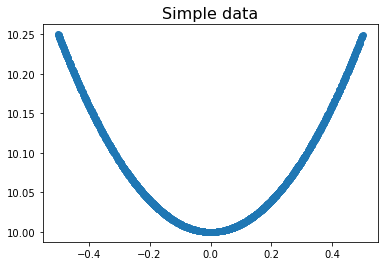

In [3]:
fig = plt.figure(1)
plt.title("Simple data", fontsize='16')	#title
plt.scatter(data[:,0], data[:,1])

In [4]:
def generator(Z,hsize=[16, 16],reuse=False): # Z is the random samples, hsize is the number of units in each hidden layer, and reuse is a variable that specifies whether to reuse the same layers or not
    with tf.variable_scope("GAN/Generator",reuse=reuse):
        h1 = tf.layers.dense(Z,hsize[0],activation=tf.nn.leaky_relu)
        h2 = tf.layers.dense(h1,hsize[1],activation=tf.nn.leaky_relu)
        out = tf.layers.dense(h2,2) # Output is a 2 dimensional vector which is our generated probability that we are trying to learn

    return out

In [5]:
def discriminator(X,hsize=[16, 16],reuse=False): # X is the real data, hsize is the number of units in each hidden layer, and reuse is a variable that specifies whether to reuse the same layers or not
    with tf.variable_scope("GAN/Discriminator",reuse=reuse):
        h1 = tf.layers.dense(X,hsize[0],activation=tf.nn.leaky_relu) 
        h2 = tf.layers.dense(h1,hsize[1],activation=tf.nn.leaky_relu)
        h3 = tf.layers.dense(h2,2) # Fixed to 2 as we are working in 2d
        out = tf.layers.dense(h3,1) # Output is a logit prediction for the given X belonging to real or fake and the feature transformation learned by the discriminator

    return out, h3

In [6]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

X = tf.placeholder(tf.float32,[None,2]) #TF variables that define X and Z for the real and random noise samples
Z = tf.placeholder(tf.float32,[None,2])

G_sample = generator(Z) # Define our graph 
r_logits, r_rep = discriminator(X) 
f_logits, g_rep = discriminator(G_sample,reuse=True)

# Obtain the loss of the generator and discriminator
disc_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=r_logits,labels=tf.ones_like(r_logits)) + tf.nn.sigmoid_cross_entropy_with_logits(logits=f_logits,labels=tf.zeros_like(f_logits)))
gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=f_logits,labels=tf.ones_like(f_logits)))

# Initialize variables needed for optimizer
gen_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="GAN/Generator")
disc_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="GAN/Discriminator")

gen_step = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(gen_loss,var_list = gen_vars) # G Train step
disc_step = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(disc_loss,var_list = disc_vars) # D Train step


Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


/apps/tensorflow/2.6.0/lib/python3.9/site-packages/keras/legacy_tf_layers/core.py:236: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/apps/tensorflow/2.6.0/lib/python3.9/site-packages/keras/engine/base_layer_v1.py:1676: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


In [7]:
# sess = tf.Session(config=config)
sess = tf.Session()
tf.global_variables_initializer().run(session=sess)

# Params
batch_size = 256
nd_steps = 10
ng_steps = 10

# Helper functions ot sample from uniform distribution
def sample_Z(m, n):
    return np.random.uniform(-1., 1., size=[m, n])

# Store the original data for plotting
x_plot = sample_data(n=batch_size)

for i in range(10001):
    X_batch = sample_data(n=batch_size)
    Z_batch = sample_Z(batch_size, 2)

    # First calculate discriminator loss
    for _ in range(nd_steps):
        _, dloss = sess.run([disc_step, disc_loss], feed_dict={X: X_batch, Z: Z_batch})
    rrep_dstep, grep_dstep = sess.run([r_rep, g_rep], feed_dict={X: X_batch, Z: Z_batch})

    # Then calculate generator loss
    for _ in range(ng_steps):
        _, gloss = sess.run([gen_step, gen_loss], feed_dict={Z: Z_batch})

    rrep_gstep, grep_gstep = sess.run([r_rep, g_rep], feed_dict={X: X_batch, Z: Z_batch})

    if(i%100==0):
        print ("Iterations: %d\t Discriminator loss: %.4f\t Generator loss: %.4f"%(i,dloss,gloss))


    if i%1000 == 0:
        plt.figure()
        g_plot = sess.run(G_sample, feed_dict={Z: Z_batch})
        xax = plt.scatter(x_plot[:,0], x_plot[:,1])
        gax = plt.scatter(g_plot[:,0],g_plot[:,1])

        plt.legend((xax,gax), ("Real Data","Generated Data"))
        plt.title('Samples at Iteration %d'%i)
        plt.tight_layout()
        plt.savefig('plots/iterations/iteration_%d.png'%i)
        plt.close()



2022-03-30 14:43:10.956419: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/slurm/lib64:/opt/slurm/lib64:
2022-03-30 14:43:10.956464: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-30 14:43:10.956491: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c0704a-s2.ufhpc): /proc/driver/nvidia/version does not exist
2022-03-30 14:43:10.956791: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Iterations: 0	 Discriminator loss: 0.8842	 Generator loss: 0.6982
Iterations: 100	 Discriminator loss: 0.0000	 Generator loss: 16.2080
Iterations: 200	 Discriminator loss: 0.0000	 Generator loss: 17.3530
Iterations: 300	 Discriminator loss: 19.5265	 Generator loss: 0.0005
Iterations: 400	 Discriminator loss: 9.8264	 Generator loss: 18.0756
Iterations: 500	 Discriminator loss: 4.7890	 Generator loss: 2.1319
Iterations: 600	 Discriminator loss: 9.6424	 Generator loss: 0.0000
Iterations: 700	 Discriminator loss: 16.5640	 Generator loss: 0.0000
Iterations: 800	 Discriminator loss: 9.5290	 Generator loss: 0.0000
Iterations: 900	 Discriminator loss: 22.0920	 Generator loss: 0.1487
Iterations: 1000	 Discriminator loss: 9.5871	 Generator loss: 0.0000
Iterations: 1100	 Discriminator loss: 6.0033	 Generator loss: 0.0003
Iterations: 1200	 Discriminator loss: 3.3651	 Generator loss: 0.0102
Iterations: 1300	 Discriminator loss: 1.3537	 Generator loss: 0.6674
Iterations: 1400	 Discriminator loss: 1.

In [10]:
from PIL import Image # Simple utility to convert images to gifs
import numpy as np
import imageio
ipath = "plots/iterations/iteration_%d.png"

images = []
for i in range(11):
    images.append(imageio.imread(ipath%(i*1000)))
imageio.mimsave('gan_results/iterations.gif', images, fps=2)

#### GAN problems

While GANs are a wonderful way to find some complex distribution we can sample from, they are also known to be challenging and difficult to train as well. Some of the issues often found during GAN training are as follows:

- So we know that the generator is driven by the loss of the discriminator as it is used to backpropagate the generators gradient. So initially in an ideal state, the discriminator will be able to easily discern between the fake and real images, however, as the generator improves the discriminator may start to struggle (as it should) in discriminating between the two classes. At this point, the discriminator should have a probability of prediction of 50% indicating that the discriminator can no londer discern the two classes and is beaten by the generator. Training must be stopped at this point or else the generator will begin to train using the discriminators unreliable and usually incorrect results.

>Solution: Implement early stopping! Attatch a callback function to the training loop that looks for a certain threshold to be reached (Loss, FID, etc.) and stop training when this threshold is reached!

- If a discriminator converges to quickly and trains too fast compared to the generator, this causes the GAN to enter into a suboptimal state. the discriminator loss will be very small at this point and this in turn, causes the GAN to try to backpropagate a very small loss to the generator which will fail to update the weights due to the vanishing gradient problem. 

>Solution: Utilize Wasserstein loss, or modify the minimax loss to deal with vanishing gradients

- The last and most well known problem of GANs is **mode collapse**. Sometimes the discriminator may be stuck in a local minimum and fails to optimize further. This can also occur as a result of the vanishing gradient problem. But essentially because the discriminator is at a weakened suboptimal state, it may not be able to correctly classify certain instances correctly. The generator will learn from this the discriminator is weak to certain instances or classes and will train exclusively on generating the same class over and over to fool the discriminator. This will lead to the generator becoming over trained at reproducing one class and overoptimization.

>Solution: Utilize Wasserstein loss, or used Unrolled GANs which are GANs that use a generator loss function that incorporates the discriminator's classifications, along with the output of future discriminator versions. This prevents the discriminator from being over-optimized and allows it to move around and escape mode collapse better.

To solve these problems we can modify the objective function of our GAN to counteract the effects of mode collapse or the vanishing gradient problem...

#### References
1. https://towardsdatascience.com/introduction-to-generative-networks-e33c18a660dd
2. https://medium.com/towards-data-science/understanding-generative-adversarial-networks-gans-cd6e4651a29
3. https://christophm.github.io/interpretable-ml-book/proto.html
4. https://blog.paperspace.com/implementing-gans-in-tensorflow/
5. http://www.offconvex.org/2020/07/06/GAN-min-max/
6. https://medium.com/voice-tech-podcast/fake-people-the-newest-ai-technology-sold-to-companies-e8ac214bf05